## Проверка гипотез по увеличению выручки интернет-магазина, А/В-тест

### Описание проекта

**Заказчик**: крупный интернет-магазин     
**Цель**: проверка гипотез для увеличения выручки (приоритизация гипотез, запуск A/B-теста и анализ результатов)


Описание данных:  

ЧАСТЬ 1   

**Hypothesis** — краткое описание гипотезы;   
**Reach** — охват пользователей по 10-балльной шкале;    
**Impact** — влияние на пользователей по 10-балльной шкале;    
**Confidence** — уверенность в гипотезе по 10-балльной шкале;    
**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


ЧАСТЬ 2     

**transactionId** — идентификатор заказа;    
**visitorId** — идентификатор пользователя, совершившего заказ;    
**date** — дата, когда был совершён заказ;    
**revenue** — выручка заказа;    
**group** — группа A/B-теста, в которую попал заказ.    
**date** — дата;    
**group** — группа A/B-теста;   
**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста  


Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

import scipy.stats as stats

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">
    
 **ЧАСТЬ 1**
</div>    

Выгрузка данных для анализа

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 1
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведение названий столбцов к нижнему регистру:

In [3]:
data.columns = map(str.lower, data.columns)
display(data.info()) #проверка корректности приведения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

**Применение фреймворка ICE для приоритизации гипотез, сортировка по убыванию приоритета**

**ICE** - один из самых популярных способов приоритизации задач 
    
ICE SCORE = impact * confidence / efforts

In [4]:
data['ICE'] = data['impact']*data['confidence']/data['efforts']

In [5]:
data_temp = data.drop(['reach', 'impact', 'confidence', 'efforts'], axis=1)
display(data_temp.sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективными по параметру ICE являются гипотезы под номерами 8, 0, 7 и 6    
Наименее перспективные - под номерами 4, 3 и 5

**Применение фреймворка RICE для приоритизации гипотез, сортировка по убыванию приоритета**

**RICE** = reach * impact * confidence / efforts

In [6]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']

In [7]:
data_temp = data.drop(['reach', 'impact', 'confidence', 'efforts'], axis=1)
display(data_temp.sort_values(by='RICE', ascending=False))

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


Наиболее перспективными по параметру RICE являются гипотезы под номерами 7, 2, 0 и 6    
Наименее перспективные - под номерами 4, 5 и 1

Приоритизация гипотез при применении RICE вместо ICE немного изменилась.    
В данном контексте важно точно оценивать параметры изучаемого метода и обращать внимание на место гипотез среди остальных, а не на абсолютную оценку.    
    
Так, наиболее приоритетными можно считать гипотезы под номерами **7**, **0** и **6**, а наименее - **4** и **5**

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">

**ЧАСТЬ 2**
</div>    

Выгрузка данных для анализа

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Приведение названий столбцов к нижнему регистру:

In [10]:
orders.columns = map(str.lower, orders.columns)
display(orders.info()) #проверка корректности приведения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Проверка на наличие дубликатов

In [11]:
orders['visitorid'].duplicated().sum()

166

In [12]:
#orders['visitorid'] = orders.drop_duplicates() 
#orders['visitorid'].duplicated().sum()
#напрямую дубликаты удалять нельзя, как представляется
#Пользователь с одним visitorid мог оказаться в разных группах

In [13]:
#Пользователь с одним visitorid мог оказаться в разных группах
#Идентификация количества уникальных visitorid
print('В целом в датасете количество уникальных visitorid: ', len(orders['visitorid'].unique()))

#Разделение датасета на группы, проверка уникальных идентификаторов по группам
groupA = orders.query('group == "A"')
print('В группе А количество уникальных visitorid:', len(groupA['visitorid'].unique()))
groupB = orders.query('group == "B"')
print('В группе В количество уникальных visitorid:', len(groupB['visitorid'].unique()))

#Сложение уникальных идентификаторов по группам
print('Результат сложения уникальных идентификаторов в разбивке по группам:',len(groupA['visitorid'].unique())+len(groupB['visitorid'].unique()))
print('Дельта равна',len(groupA['visitorid'].unique())+len(groupB['visitorid'].unique())-len(orders['visitorid'].unique()))


В целом в датасете количество уникальных visitorid:  1031
В группе А количество уникальных visitorid: 503
В группе В количество уникальных visitorid: 586
Результат сложения уникальных идентификаторов в разбивке по группам: 1089
Дельта равна 58


In [14]:
#попытка сделать правильную очистку
no_uniq_visitorid = []
for i in groupA['visitorid']:
    for j in groupB['visitorid']:
        if i == j:
            no_uniq_visitorid.append(i)
#print(no_uniq_visitorid)


In [15]:
#no_uniq_visitorid =  orders.query('(visitorid in @groupA['visitorid']) and (visitorid in @groupB['visitorid'])')
#print(len(no_uniq_visitorid))
orders = orders.query('visitorid not in @no_uniq_visitorid')
#print(orders.query('group == "B"').count())
#print(orders.query('group == "A"').count())

In [16]:
#Необходимо убрать упомянутые ранее 58 строк
#orders = pd.concat([groupA, groupB]).drop_duplicates(subset = 'visitorid').reset_index(drop=True)
#print(orders.query('group == "A"').count()) #проверка того, что все лишнее удалилось
#print(orders.query('group == "B"').count()) #проверка того, что все лишнее удалилось

In [17]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [18]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [19]:
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [20]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

**Кумулятивная выручка по группам**

In [21]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
#кумулятивная выручка для группы А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
#кумулятивная выручка для группы В
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

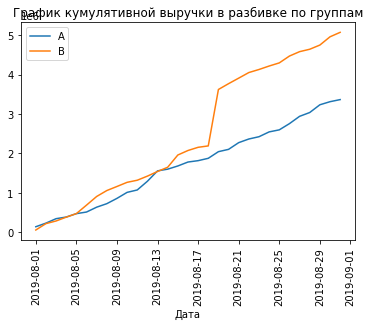

In [22]:
#график для группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
#график для группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки в разбивке по группам')
plt.xticks(rotation=90)
plt.legend() 
plt.xlabel('Дата')
plt.show()

Кумулятивная выручка группы В резко возросла с конца августа 2019 года и в целом была выше почти на всем временном промежутке.

Показатели по группам были примерно равны 13 августа 2019 года

**Кумулятивный средний чек по группам**    

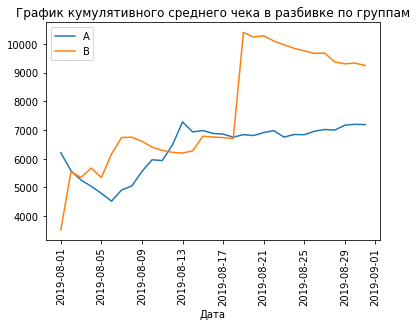

In [23]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека в разбивке по группам')
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.legend() 
plt.show()

Средний чек по группе В выше практически на всем рассматриваемом временном промежутке. Наибольший скачок наблюдался в августе 2019 года 

**Относительное изменение кумулятивного среднего чека группы В к группе А**     

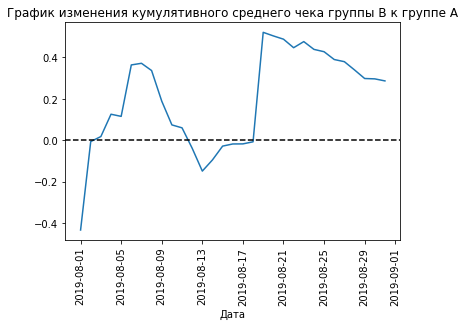

In [24]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.show()

Исходя из полученного графика можно сделать предположение о том, в какие даты были совершены аномальные заказы

**График кумулятивной конверсии по группам**    

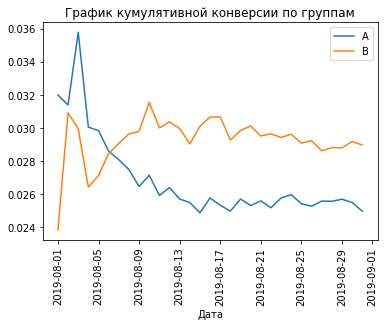

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.legend()
plt.show()

Конверсия группы В выше практически на всем рассматриваемом временном промежутке. Однако в первых числах мая сегмент А имел большую конверсию.

**График относительного изменения кумулятивной конверсии группы B к группе A**    

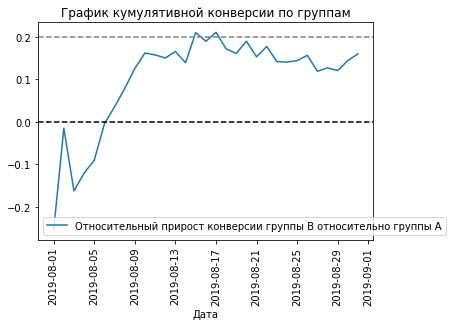

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()

График относительного различия конверсии между группами подтвердил превосходство группы В по конверсии (в середине августа прирост относительно группы А был 20%)

**Точечный график количества заказов по пользователям**    

       visitors  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


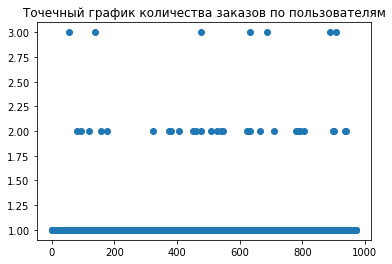

In [27]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitors', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Подготовка к построению точечного графика
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

**95-й и 99-й перцентили количества заказов на пользователя.**
**Выбор границы для определения аномальных пользователей**    

In [28]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали более 2 заказов, не более 1% пользователей -  больше 4 заказов

**Точечный график стоимостей заказов**

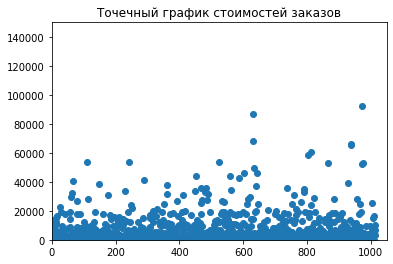

In [29]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1050, 0, 150000])
plt.show()

Большинство покупок было совершено на сумму менее 20 000 рублей

**95-й и 99-й перцентили стоимости заказов.**
**Выбор границы для определения аномальных заказов**    
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [30]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


<div class="alert alert-block alert-info">
  
Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.
    
Так, в дальнейшем можем принять за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 54 000 рублей.
</div>

**Cтатистическая значимость различий в среднем количестве заказов между группами по «сырым» данным**    

In [31]:
#для группы А
ordersByUsersA = (
    orders[orders['group']=='A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid':'nunique'})
)
ordersByUsersA.columns = ['visitorid', 'orders']

#для группы В
ordersByUsersB = (
    orders[orders['group']=='B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid':'nunique'})
)
ordersByUsersB.columns = ['visitorid', 'orders']

**H0** - Нет различий в среднем количестве заказов между группами

**H1** - Есть различия в среднем количестве заказов между группами

In [32]:
#Подготовка данных (по примеру из тренажера)
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#print(data.head(5)) 

In [33]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 


p-value: 0.011
0.160


По «сырым» данным различия в среднем числе заказов групп A и B есть.

Первое число — p-value = 0.02 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

<div class="alert alert-block alert-info">

    
    
Новый вывод: 
    
По «сырым» данным различий в среднем числе заказов групп A и B нет.

Первое число — p-value = 0.526 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем.
</div>


<div class="alert alert-block alert-info">
  


По «сырым» данным различия в среднем числе заказов групп A и B есть.

Первое число — p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами А и В нет, отвергаем.
</div>


**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**


**Нулевая гипотеза**: различий в среднем чеке между группами нет    
**Альтернативная гипотеза**: различия в среднем чеке между группами есть

In [34]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value: 0.829
0.287


P-value = 0.829 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.     

**Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным**    

Подготовка данных (очистка)

Узнаем, сколько всего аномальных пользователей атрибутом shape

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 57000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
Name: visitorid, dtype: int64
45


Всего 11 аномальных пользователей

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

**H0** - Нет различий в среднем количестве заказов между группами (для очищенных данных)

**H1** - Есть различия в среднем количестве заказов между группами (для очищенных данных)

In [37]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.008
0.188


Результаты по среднему количеству заказов почти не изменились (p-value по-прежнему менее 0,05)

Как и в случае с данными без очистки, p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов для очищенных данных между группами нет, отвергаем.

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

**Нулевая гипотеза**: различий в среднем чеке между группами нет (для очищенных данных)

**Альтернативная гипотеза**: различия в среднем чеке между группами есть (для очищенных данных)

In [38]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


p-value: 0.969
0.002


P-value увеличился с 0.829 до 0.969 (превышает 0,05). Как следствие, причин отвергать нулевую гипотезу и считать, что в среднем чеке для очищенных данных есть различия, нет.
Разница между сегментами сократилась с 28% до 2%

После удаления выбросов в данных стало меньше шума

**ИТОГ**:    

Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий (на уровне значимости 5%)

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий (на уровне значимости 5%)


График различия конверсии между группами, как и график различия среднего чека, сообщает, что результаты группы B лучше группы A


Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В.

### Вывод

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">
    
В результате проведенного исследования были изучены несколько наборов данных. Была проведена приоритизация гипотез для увеличения выручки (методами RICE и ICE), а также проанализированы результаты A/B-теста.
    
**В части 1**:
    Приоритизация гипотез при применении RICE вместо ICE немного изменилась. Однако все же наиболее приоритетными можно считать гипотезы:
    
   - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
   - Запустить акцию, дающую скидку на товар в день рождения
   - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
    
а наименее приоритетными: 
   - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	
   - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
    
**В части 2**:

было обнаружено:
    
- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий (на уровне значимости 5%)

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий (на уровне значимости 5%)

- График различия конверсии между группами и график различия среднего чека сообщает, что результаты группы B лучше группы A

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В.
    
</div>